<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/blob/main/Actividades/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

CIENCIA Y ANALITICA DE DATOS

Profesora:  Dra. Maria de la Paz Rico Fernandez

Alumno: Jose Ramiro Adan Charles

Matricula: A00174646

27 de Octubre de 2022


**--PREGUNTAS RESPONDIDAS AL FINAL DEL NOTEBOOK**

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = W @ D @ Winv
print(B.astype(float))
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1
#Cargamos la matriz 1 solicitada y reusamos el codigo del ejempo para generar la descomposición y su poesterior reconstrucción.
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#Hacemos la multiplicación de matrices usando el operador @ que realiza la función de multiplicar matrices.
B= W @ D @ Winv
#Usamos la opcion de 2 decimales para mas claridad en la impresion de la matriz reconstruida.
np.set_printoptions(precision=2)
print(B.astype(float))
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54+0.j   0.23+1.83j 0.23-1.83j]
[[-0.8 +0.j   -0.05+0.26j -0.05-0.26j]
 [-0.56+0.j    0.86+0.j    0.86-0.j  ]
 [-0.22+0.j   -0.17-0.4j  -0.17+0.4j ]]
-------Matriz reconstruida-------
[[ 3.00e+00  3.37e-16  2.00e+00]
 [ 3.00e+00  9.99e-16 -2.00e+00]
 [ 1.11e-16  1.00e+00  1.00e+00]]
-----------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


In [ ]:
#Matriz 2
#Cargamos la matriz 1 solicitada y reusamos el codigo del ejempo para generar la descomposición y su poesterior reconstrucción.
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#Hacemos la multiplicación de matrices usando el operador @ que realiza la función de multiplicar matrices.
B= W @ D @Winv
#Usamos la opcion de 2 decimales para mas claridad en la impresion de la matriz reconstruida.
np.set_printoptions(precision=2)
print(B.astype(float))
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83 -0.71 -0.42]
 [ 0.55  0.71 -0.85]
 [ 0.    0.    0.32]]
-------Matriz reconstruida-------
[[1.00e+00 3.00e+00 8.00e+00]
 [2.00e+00 7.41e-17 7.08e-16]
 [0.00e+00 0.00e+00 1.00e+00]]
-----------------------------


In [ ]:
#Matriz 3
#Cargamos la matriz 1 solicitada y reusamos el codigo del ejempo para generar la descomposición y su poesterior reconstrucción.
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
#Hacemos la multiplicación de matrices usando el operador @ que realiza la función de multiplicar matrices.
B= W @ D @ Winv
#Usamos la opcion de 2 decimales para mas claridad en la impresion de la matriz reconstruida.
np.set_printoptions(precision=2)
print(B.astype(float))
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 7. -0. -1.]
[[ 0.  1.  1.]
 [ 0. -1. -1.]
 [ 1. -0. -0.]]
-------Matriz reconstruida-------
[[ 5.00e+00  4.00e+00 -1.54e-15]
 [ 1.00e+00 -1.30e-15  1.00e+00]
 [ 1.00e+01  7.00e+00  1.00e+00]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


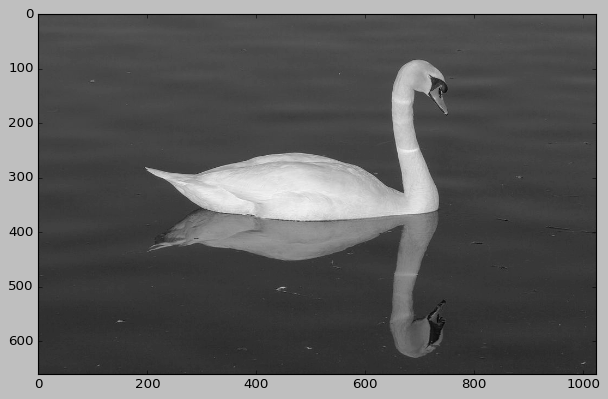

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F073F29D690>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt


plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

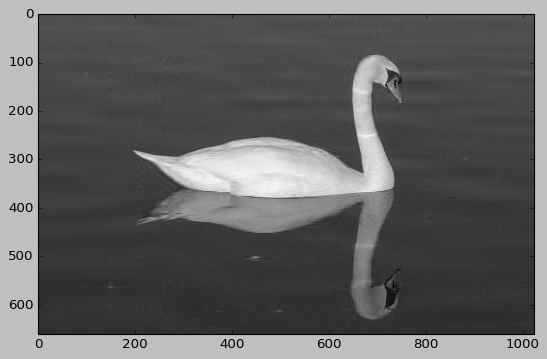

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[76. 76. 76. ... 41. 41. 46.]


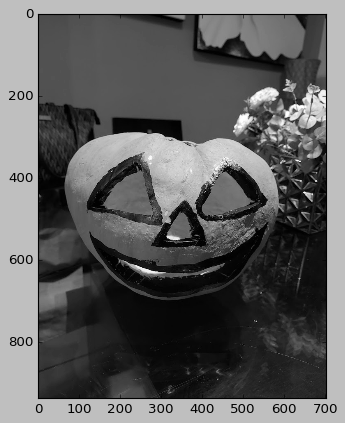

<PIL.Image.Image image mode=LA size=703x937 at 0x7F07270E5CD0>


In [ ]:
#imagen 1
#Reutilizando el código ejemplo para cargar la primer imagen.
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/c35b0d1176e63d22ebb50a2742afa95a1a4caeb1/Actividades/original_043d5f3f-e9cb-4445-b0b1-aa0f339f0f71_20221027_064532.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(937, 703)

In [ ]:
U.shape

(937, 937)

In [ ]:
V.shape

(703, 703)

In [ ]:
#Reutilizando el codigo ejemplo pero cambiando nvalue a un valor minimo donde no se note tanta diferencia de calidad.
#Enconramos que un valor menor a 100 hace visibles rayas en el area de la pared por lo que considero que 100 es aceptable.
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[145. 145. 146. ...  79.  77.  76.]


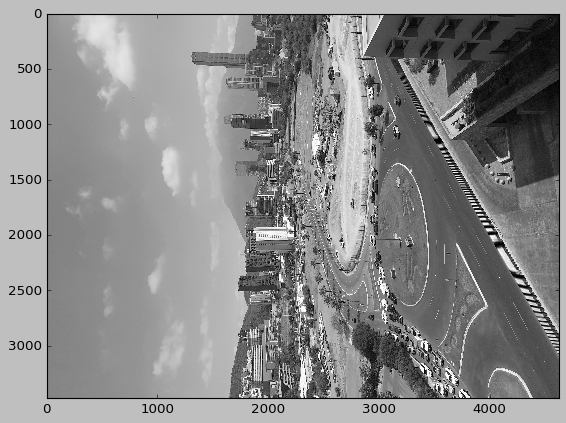

<PIL.Image.Image image mode=LA size=4624x3468 at 0x7F0731555050>


In [ ]:
#imagen 2
#Reutilizando el código ejemplo para cargar la segunda imagen.
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://github.com/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/blob/main/Actividades/20221015_140804.jpg?raw=true')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(3468, 4624)

In [ ]:
U.shape

(3468, 3468)

In [ ]:
V.shape

(4624, 4624)

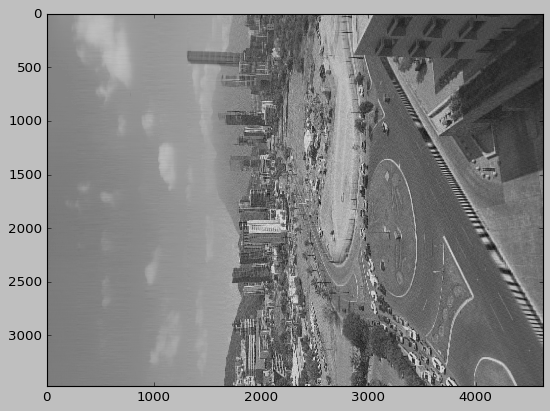

In [ ]:
#Reutilizando el codigo ejemplo pero cambiando nvalue a un valor minimo donde no se note tanta diferencia de calidad.
#Un valor menor a 175 hace visibles rayas en el area del cielo.
nvalue = 175
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

[178. 169. 164. ...  39.  29.  24.]


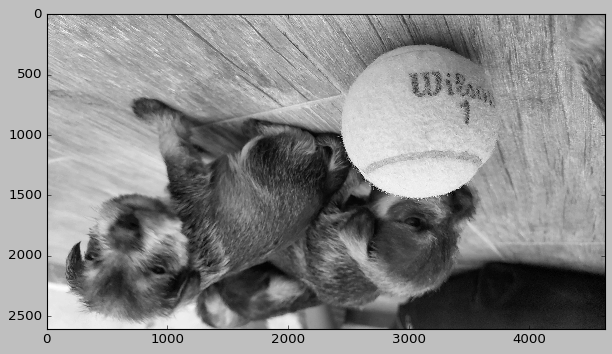

<PIL.Image.Image image mode=LA size=4624x2604 at 0x7F071EC618D0>


In [ ]:
#imagen 3
#Reutilizando el código ejemplo para cargar la tercer imagen.
plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://github.com/PosgradoMNA/actividades-de-aprendizaje-JoseRAdan/blob/main/Actividades/20221015_183235.jpg?raw=true')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(2604, 4624)

In [ ]:
U.shape

(2604, 2604)

In [ ]:
V.shape

(4624, 4624)

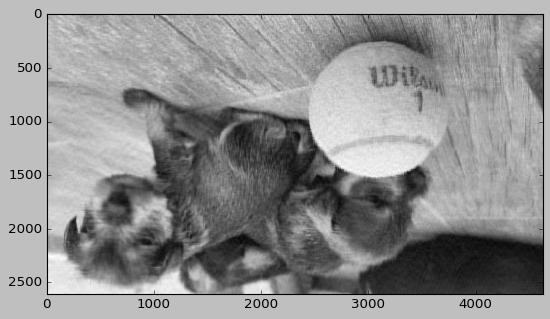

In [ ]:
#Reutilizando el codigo ejemplo pero cambiando nvalue a un valor minimo donde no se note tanta diferencia de calidad.
#Con un valor tan bajo como 60 la calidad de la imagen aun es muy parecida a la original.
nvalue = 60
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [57]:
#tu codigo aqui
#Usamos un dataset de numpy (Iris) para ejemplo de una reducción PCA.
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

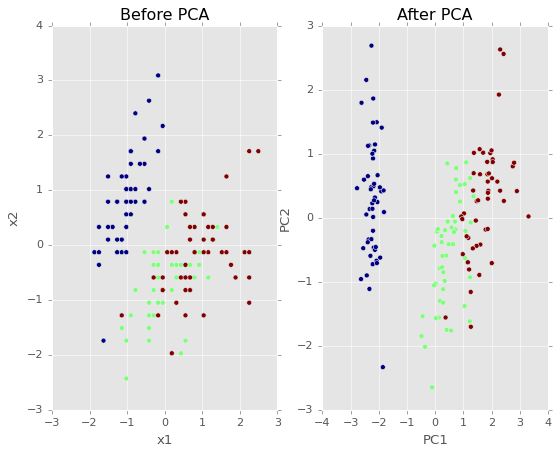

In [58]:
#Mostrmos gráficamente lod datos antes y después de aplicar la reducción PCA.
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [61]:
print(pca.explained_variance_ratio_)
#El resultado muestra que PC1 explica el 73% de la varianza y PC2 el 23%, por lo que juntos suman un 95%

[0.73 0.23]


In [64]:
#Para probar que los eigenvalores de la matriz original son iguales a los de la matriz reducida.
np.cov(X_new.T)

array([[2.94e+00, 5.34e-16],
       [5.34e-16, 9.20e-01]])

In [65]:
pca.explained_variance_

array([2.94, 0.92])

In [ ]:
#2.94 y 0.92 iguales en la matriz original y la matriz reducida.

In [67]:
#Para conocer las variables más importantes vemos que en el primer renglón (PC1) las principales variables (valores más grandes) son la 1 (0.52), 3 (0.58) y 4 (0.56)
#y para PC2 son la 2 (0.92) y luego la 1 (0.38)
print(abs( pca.components_ ))

[[0.52 0.27 0.58 0.56]
 [0.38 0.92 0.02 0.07]]


In [74]:
#Se define una función para proyectar una bi-gráfica
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

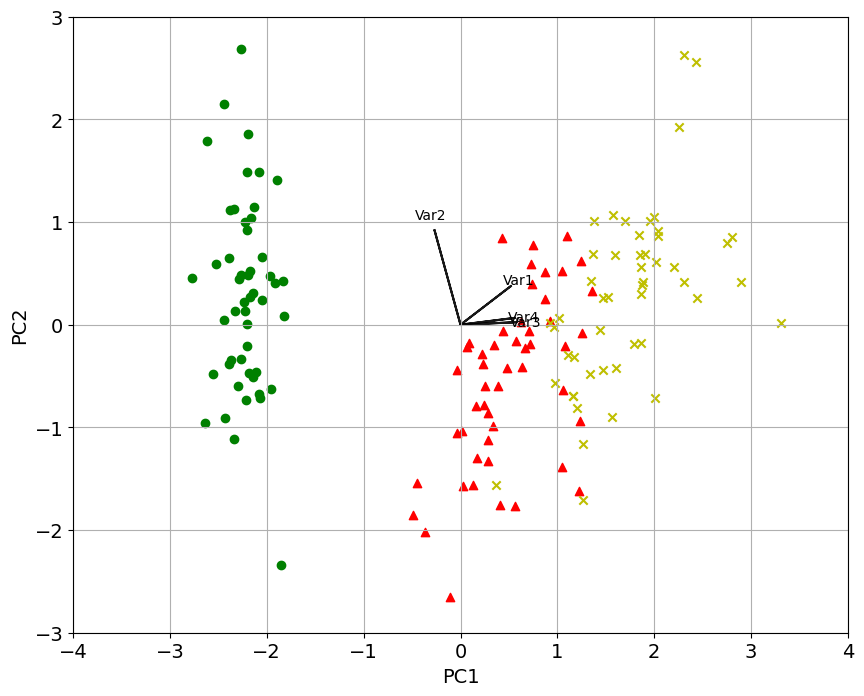

In [75]:
#Se llama a la función para graficar ambas correlaciones (PC1 y PC2)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [71]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [72]:
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

**¿Qué es feature importance y para que nos sirve?**

Puesto que el método PCA se basa en determinar las variables que aportan la máxima varianza, el poder calcular el valor de cada una de ellas nos indica cuales son las que más contribuyen a dicha varianza y con ello se pueden tomar las decisiones de cuales son las esencialmente relevantes para considerar que el resultado del modelo es aceptable.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**
Durante este ejercicio y la del artículo me permite entender el fundamento algebraico de porque el PCA es un metodo efectivo de hacer una reduccion de variables, y las ventajas que esto conlleva, que es la simplificacion del procesamiento en el modelo, que finalmente resulta en modelos mas simples y por lo general mas acertados, pues las variables que no aportan una informacion relevante son generadoras de ruido que afectan la precision del modelo.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
En determinacion de las variables necesarias para un modelo de mantenimiento predictivo de maquinas industriales, pues las maquinas actuales tienen la capacidad de generar gran cantidad de datos, a veces cientos de variables y miles de observaciones por hora, muchas de las cuales se utilizan para multiples propositos pero con toda seguridad solo algunas de ellas son las que realmente aportarian valores relevantes para hacer la prediccion de una falla.